# IMPORT LIBRARY

In [8]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow.keras.applications')

# IMPORT DATASET

In [9]:
dir = 'C:/Users/Irpan/Documents/PCD-IRPAN/DATASET/'  # pastikan path ini benar

train_dir = os.path.join(dir, 'train')
val_dir = os.path.join(dir, 'val')
test_dir = os.path.join(dir, 'test')

# DATA UNDERSTANDING

In [10]:
# List kelas (subfolder) dalam setiap direktori
classes = os.listdir(train_dir)

# Inisialisasi variabel untuk menyimpan nilai maksimum dan minimum
format_data = ''
max_size_data = (0, 0)
min_size_data = (float('inf'), float('inf'))
channels = 0

for class_name in classes:
    class_dir_train = os.path.join(train_dir, class_name)
    class_dir_val = os.path.join(val_dir, class_name)
    class_dir_test = os.path.join(test_dir, class_name)

    # Menghitung dan menampilkan informasi tentang setiap gambar
    for folder in [class_dir_train, class_dir_val, class_dir_test]:
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            format_data = img.format
            size_data = img.size
            channels = len(img.getbands())

            if size_data > max_size_data:
                max_size_data = size_data
            if size_data < min_size_data:
                min_size_data = size_data

# Menampilkan nilai maksimum dan minimum
print(f'Format Data: {format_data}')
print(f'Max Ukuran Data: {max_size_data}')
print(f'Min Ukuran Data: {min_size_data}')
print(f'Ukuran Channel: {channels}')

Format Data: JPEG
Max Ukuran Data: (256, 256)
Min Ukuran Data: (256, 256)
Ukuran Channel: 3


# DATA PREPARATION

In [11]:
IMG_SIZE = 224

In [12]:
train_gen = ImageDataGenerator(
    rescale=1.0/224.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_gen = ImageDataGenerator(
    rescale=1.0/224.0,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1.0/224.0)

In [13]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode='categorical',
    shuffle=False
)

Found 1506 images belonging to 3 classes.
Found 323 images belonging to 3 classes.
Found 323 images belonging to 3 classes.


# MODELING

In [14]:
# Membangun Model dengan MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [15]:
# Membekukan layer dasar MobileNet agar tidak dilatih ulang
base_model.trainable = False

In [16]:
model =tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
)

C:\Users\Irpan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7175 - loss: 0.8338 - val_accuracy: 0.9505 - val_loss: 0.1148
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9466 - loss: 0.1465 - val_accuracy: 0.9598 - val_loss: 0.1032
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9770 - loss: 0.0826 - val_accuracy: 0.9536 - val_loss: 0.1143
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9673 - loss: 0.0905 - val_accuracy: 0.9814 - val_loss: 0.0617
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9741 - loss: 0.0639 - val_accuracy: 0.9690 - val_loss: 0.0775
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9688 - loss: 0.0844 - val_accuracy: 0.9659 - val_loss: 0.0957
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9750 - loss: 0.0653 - val_accuracy: 0.9752 - val_loss: 0.0724
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9803 - loss: 0.0519 - val_accuracy: 0.9938 - val_loss:

# EVALUASI

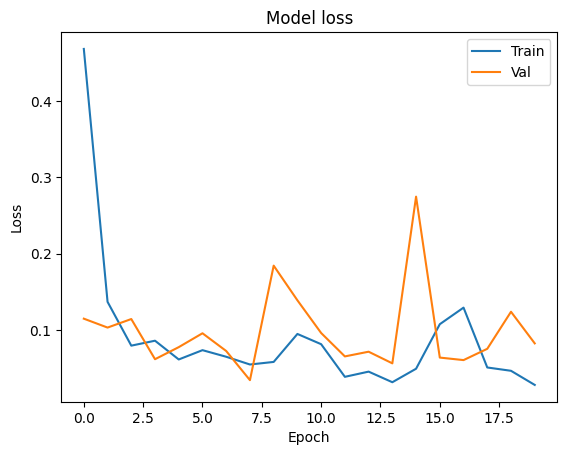

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

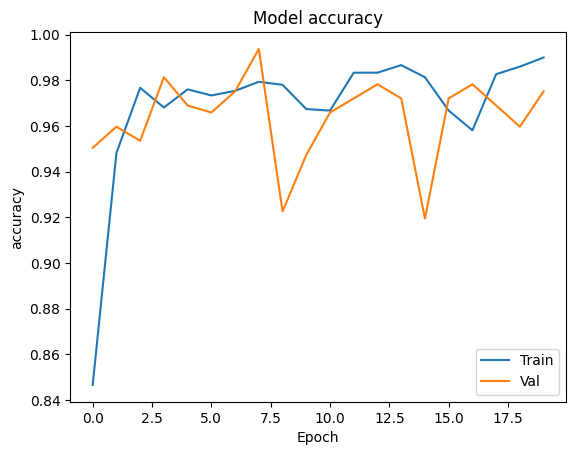

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
# Prediksi pada data uji
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 771ms/step


In [22]:
# Mendapatkan label sebenarnya
y_true = test_data.classes

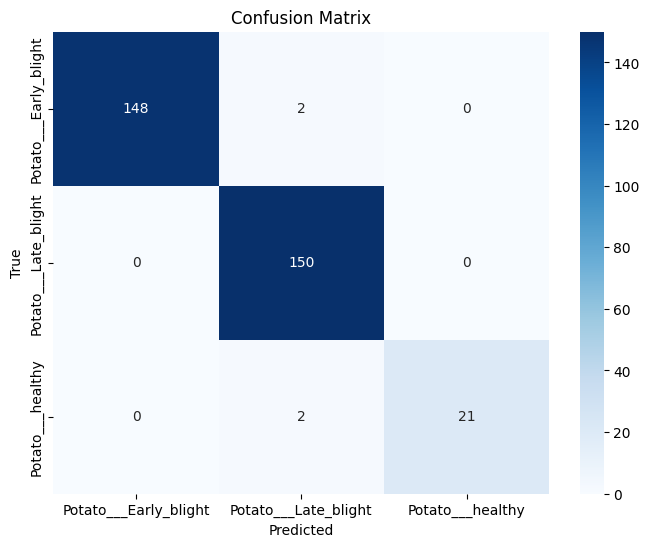

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(),
            yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.97      1.00      0.99       150
           2       1.00      0.91      0.95        23

    accuracy                           0.99       323
   macro avg       0.99      0.97      0.98       323
weighted avg       0.99      0.99      0.99       323



In [25]:
loss, accuracy = model.evaluate(train_data)
print(f'Akurasi Model: {accuracy*100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9781 - loss: 0.0661
Akurasi Model: 98.27%


In [26]:
loss, accuracy = model.evaluate(val_data)
print(f'Akurasi Validasi: {accuracy*100:.2f}%')

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9778 - loss: 0.0660
Akurasi Validasi: 97.52%


# SAVE MODEL

In [28]:
model.save(dir + "hasil/model_6class.keras")

Mobile Net Runtime Lebih Cepat
